# Import data
copying from wfdb website 
https://wfdb.readthedocs.io/en/latest/processing.html#module-3

In [1]:

# Libraries for interfacing with WFDB data
import wfdb
from wfdb import processing

#Classical libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Files stuff to read from disk
path='physionet.org/files/fantasia/1.0.0/' # relative path to data files
files= np.loadtxt(path+'RECORDS', dtype='str') # name of all files (no extensions as required by wfdb functions)

In [13]:
# DataFrames to handle all signals (RAW ECG, RR intervals, Annotations, ...)
ECG_sig=pd.DataFrame()

RR_intervals = pd.DataFrame()

In [25]:

# Read ECG data from files and store them in Pandas DataFrame
# Save fields too, for further optional analysis
for file in files:
    sig, fields =  wfdb.rdsamp(path + file, channels=[1]) # channel 1 maps to ECG data
    ECG_sig = pd.concat([ECG_sig, pd.DataFrame({file : sig.T[0]})], axis=1)


    # Compute R peaks and RR sample distances
    xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
    xqrs.detect()
    rr=processing.calc_rr(xqrs.qrs_inds,fs=fields['fs'])
    RR_intervals = pd.concat([RR_intervals, pd.DataFrame({file : rr})], axis=1)
   
    
    
    
    #xqrs.detect()

    #rr=processing.calc_rr(xqrs.qrs_inds,fs=fields['fs'])


Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learn

KeyboardInterrupt: 

TypeError: 'method' object is not subscriptable

In [4]:
len(sig_list

40

In [5]:
print(np.shape(sig))

(1793872, 1)


In [6]:
plt.plot(output[0][:,0], label='breath signal')
plt.plot(output[0][:,1], label='ecg signal')
plt.xlim(0,800)
plt.legend()
plt.show()

NameError: name 'output' is not defined

In [ ]:
sig, fields = wfdb.rdsamp('physionet.org/files/fantasia/1.0.0/f1o01', channels=[1])
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


In [ ]:
xqrs.qrs_inds

array([    165,     414,     659, ..., 1812238, 1812472, 1812716])

In [ ]:
output[0][:,1]

array([8.46 , 8.592, 8.352, ..., 8.172, 7.892, 7.94 ])

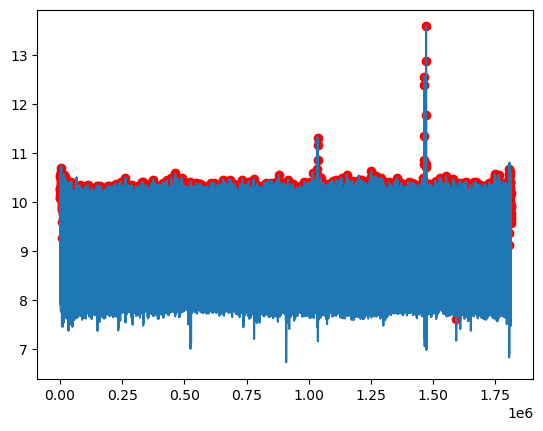

In [ ]:
#%matplotlib widget
plt.plot(output[0][:,1], label='ecg signal')
plt.scatter(xqrs.qrs_inds, output[0][:,1][xqrs.qrs_inds], color='r')
#plt.xlim(0, 1200)

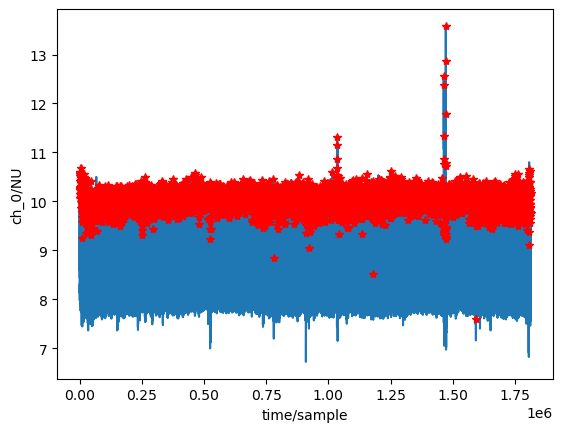

In [ ]:
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])
#plt.xlim(0,400)
#plt.show()

In [ ]:
ann_ref = wfdb.rdann('physionet.org/files/fantasia/1.0.0/f1o01', 'ecg')

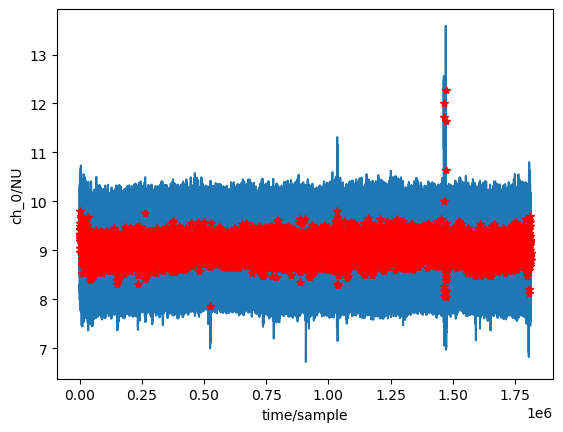

In [ ]:
wfdb.plot_items(signal=sig, ann_samp=[ann_ref.sample])


7168 reference annotations, 7172 test annotations

True Positives (matched samples): 2712
False Positives (unmatched test samples): 4460
False Negatives (unmatched reference samples): 4456

Sensitivity: 0.3783 (2712/7168)
Positive Predictivity: 0.3781 (2712/7172)


/home/tom/anaconda3/lib/python3.9/site-packages/wfdb/processing/evaluate.py:403: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


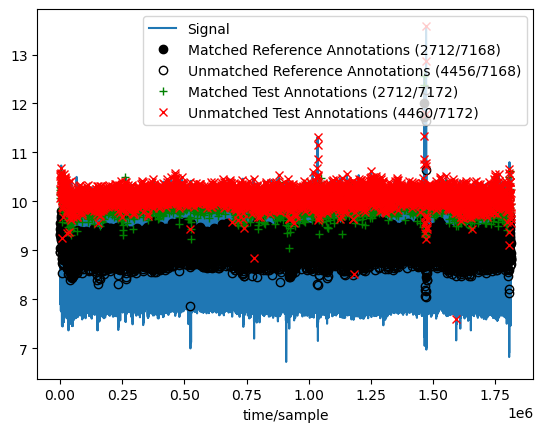

In [ ]:
comparitor = processing.compare_annotations(ann_ref.sample[1:],
                                                xqrs.qrs_inds,
                                                int(0.01 * fields['fs']),
                                                sig[:,0])
comparitor.print_summary()
comparitor.plot()

In [ ]:
rr=processing.calc_rr(xqrs.qrs_inds,fs=fields['fs'])

In [ ]:
rr

array([249, 245, 246, ..., 222, 234, 244])

In [ ]:
rr_file=processing.ann2rr('physionet.org/files/fantasia/1.0.0/f1o01', 'ecg')
rr_file

array([167, 248, 245, ..., 223, 234, 244])

In [ ]:
rr_file.shape, rr.shape

((7169,), (7171,))

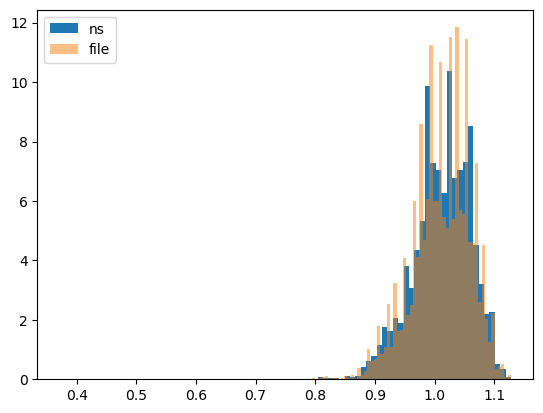

In [ ]:
plt.hist(rr/250, bins=int(np.sqrt(len(rr))), label='ns', density=True)
plt.hist(rr_file/250, bins=int(np.sqrt(len(rr))), label='file', density=True, alpha=0.5)
plt.legend()
#plt.xlim(0.8, 1.2)
plt.show()

In [ ]:
np.mean(rr), np.std(rr)

(252.76126063310556, 12.61736025072354)

In [ ]:
np.mean(rr_file), np.std(rr_file)

(252.8550704421816, 12.051919683412963)